./input/.DS_Store
./input/california-housing-prices/housing.csv


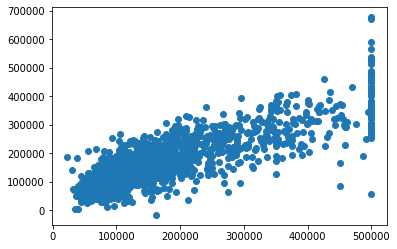

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot
import pylab

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run will list all files under the input directory
import os
#for dirname, _, filenames in os.walk('./input'):
#   for filename in filenames:
#      print(os.path.join(dirname, filename))
    
data = pd.read_csv('./input/california-housing-prices/housing.csv', delimiter=',')

data['ocean_proximity'] = data['ocean_proximity'].map({'NEAR BAY': 10000, 'INLAND': 0})

#Remove records with NaN
data = data.dropna()

msk = np.random.rand(len(data)) < 0.8

train_data = data[msk]
test_data = data[~msk]

train_labels = train_data['median_house_value'] .to_numpy()

train_features = train_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]

test_labels = test_data['median_house_value'] 
test_features = test_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]

poly = PolynomialFeatures(degree=1)
X_ = poly.fit_transform(train_features)
X_test_ = poly.fit_transform(test_features)

reg = LinearRegression().fit(X_, train_labels)

pred= reg.predict(X_test_)
matplotlib.pyplot.scatter(test_labels,pred)

matplotlib.pyplot.show()
